<a href="https://colab.research.google.com/github/Lukman289/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

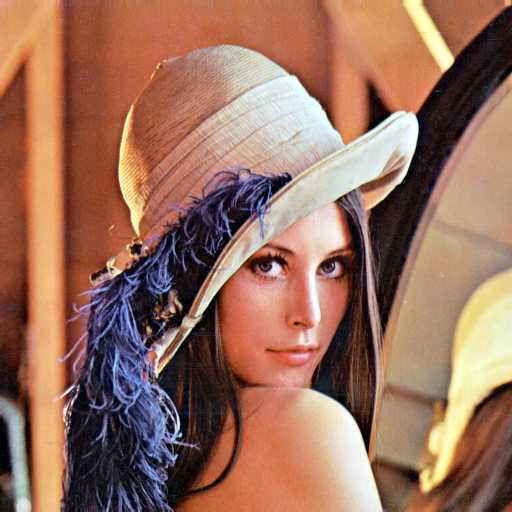

(512, 512, 3)

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/lena.jpg')

cv2_imshow(img1)
img1.shape

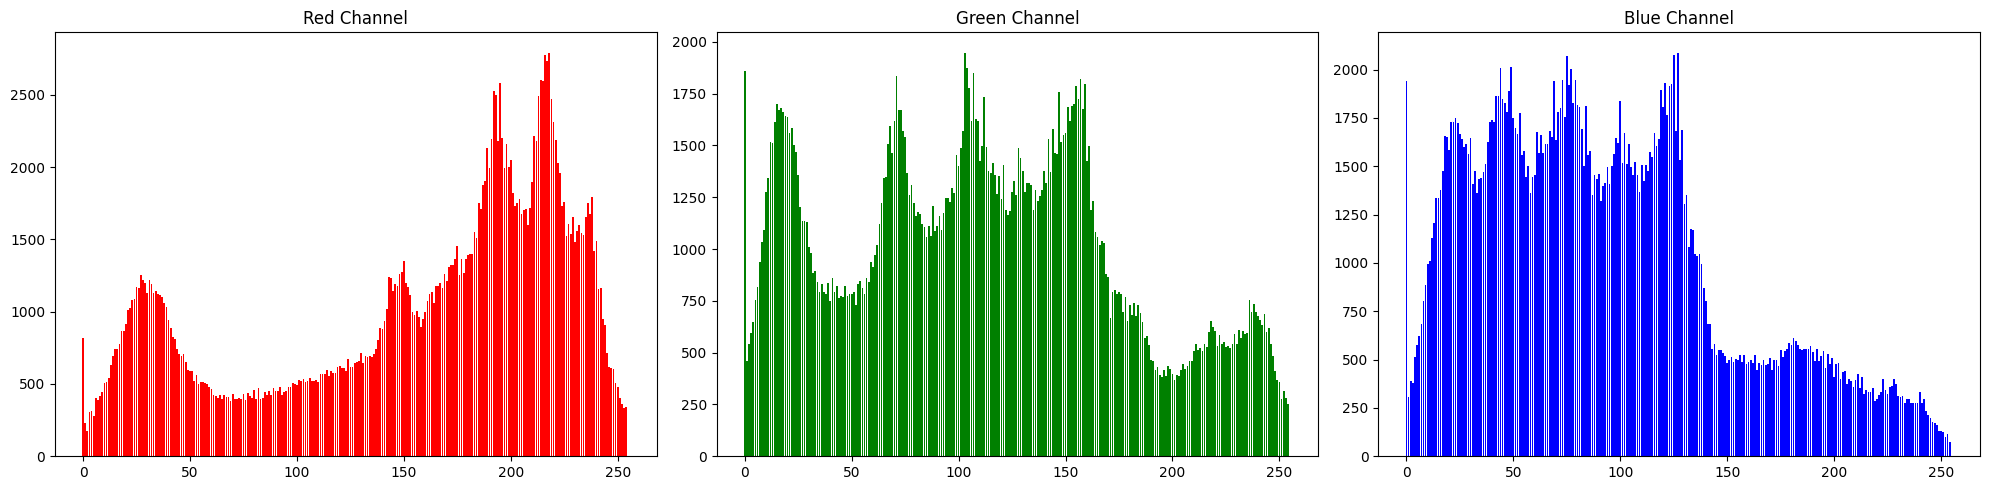

In [ ]:
def plotHist(image):
    plt.figure(figsize=(20, 5))
    num_channels = 3

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_hist = cv.calcHist([image], [i], None, [256], [0, 255])

        plt.subplot(1, 3, i + 1)
        plt.bar(np.arange(256), channel_hist[:, 0], color=color.lower(), width=0.8)
        plt.title(f"{color} Channel", fontsize=12)

    plt.tight_layout()
    plt.show()

img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plotHist(img1_rgb)


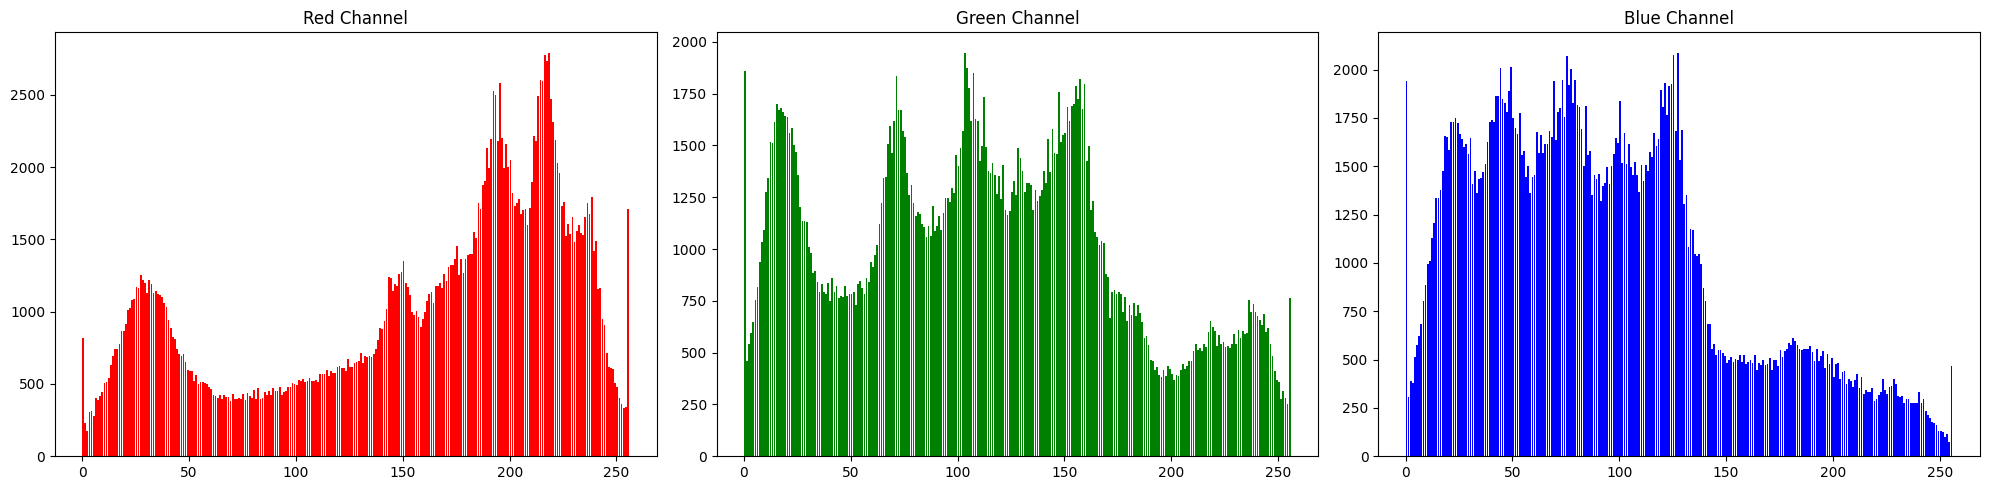

In [ ]:
from skimage.transform import resize
def npHist(image):
    plt.figure(figsize=(20, 5))
    num_channels = 3

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_data = image[:,:,i]
        hist_values, bin_edges = np.histogram(channel_data,256,[0,256])

        plt.subplot(1, 3, i + 1)
        plt.hist(channel_data.ravel(),256,[0,256], color=color.lower(), width=0.8)
        plt.title(f"{color} Channel", fontsize=12)

    plt.tight_layout()
    plt.show()

npHist(img1_rgb)

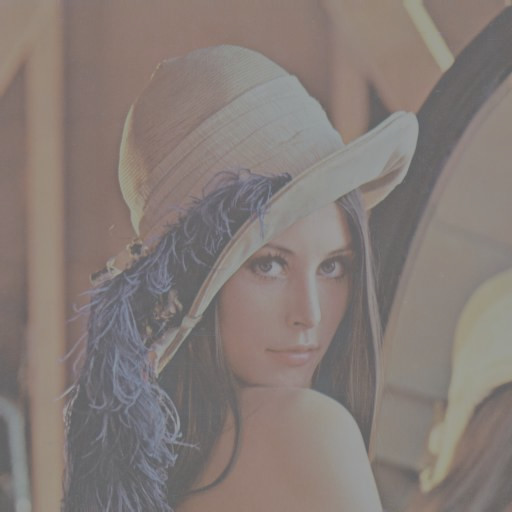

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/lena_lc.jpg')

cv2_imshow(img2)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [ ]:
def histEq(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    cdf = hist.cumsum()

    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    img2_eq = cdf[image]

    return img2_eq

img2_histEq = histEq(img2_rgb)


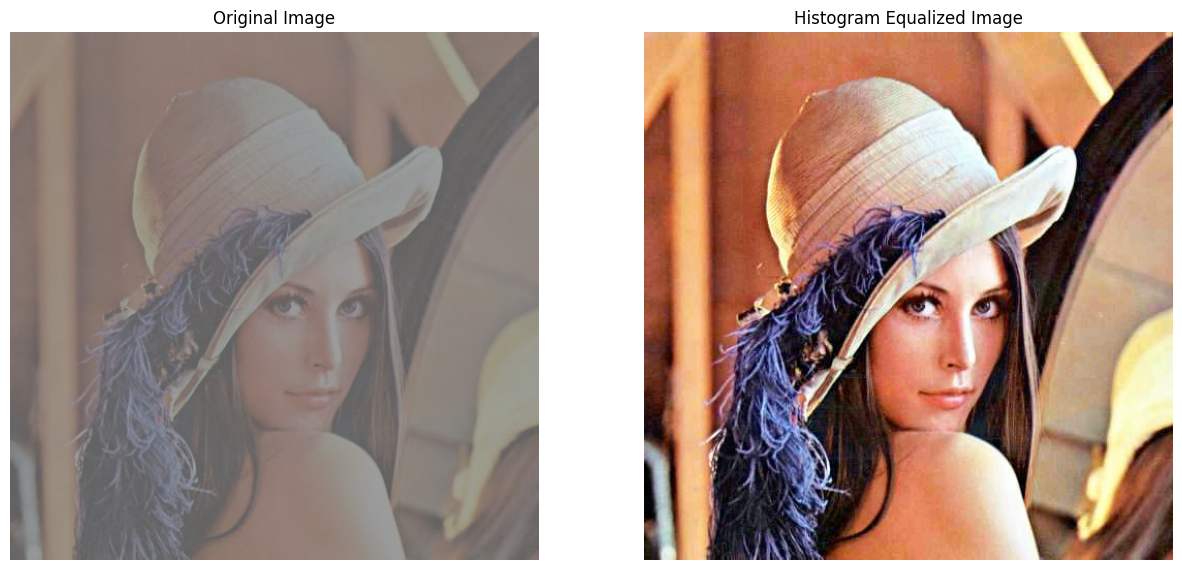

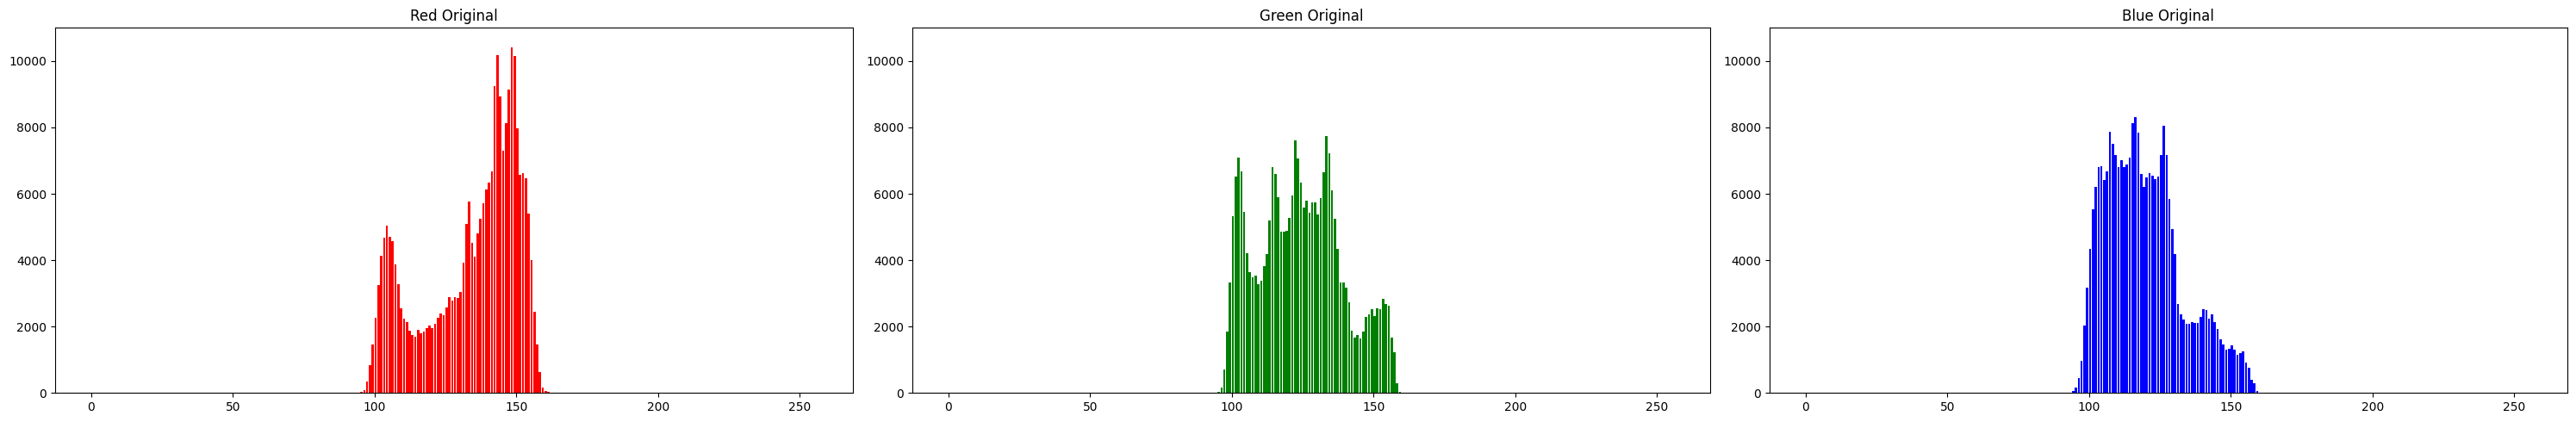

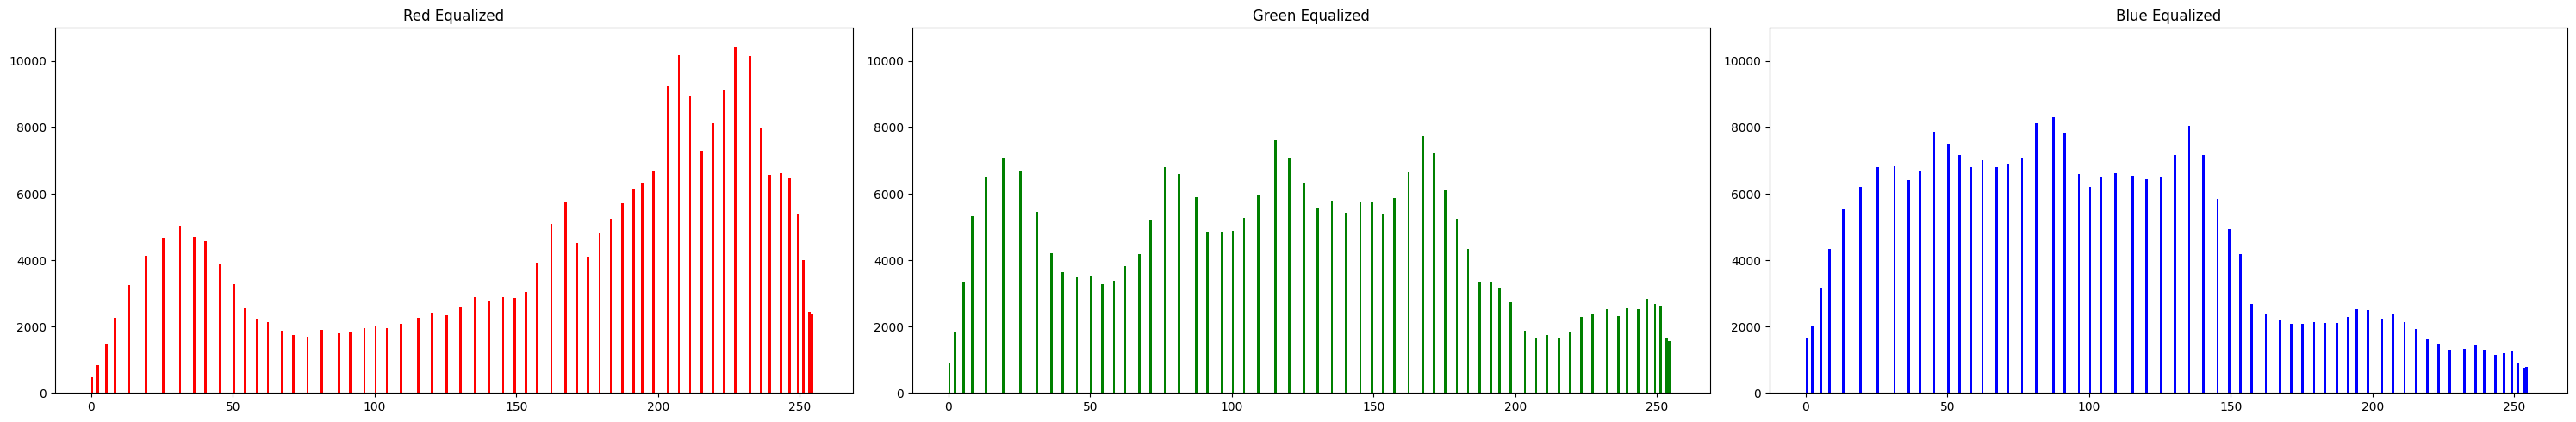

In [ ]:
# img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

def npHist1(image, title):
    plt.figure(figsize=(30, 5))
    num_channels = 3

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_data = image[:,:,i]
        hist_values, bin_edges = np.histogram(channel_data,256,[0,256])

        plt.subplot(1, 3, i + 1)
        plt.hist(channel_data.ravel(),256,[0,256], color=color.lower(), width=0.8)
        plt.ylim(0, 11000)
        plt.title(f"{color} {title}", fontsize=12)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img2_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram Equalized Image')
plt.imshow(img2_histEq)
plt.axis('off')
plt.show()

npHist1(img2_rgb, 'Original')
npHist1(img2_histEq, 'Equalized')

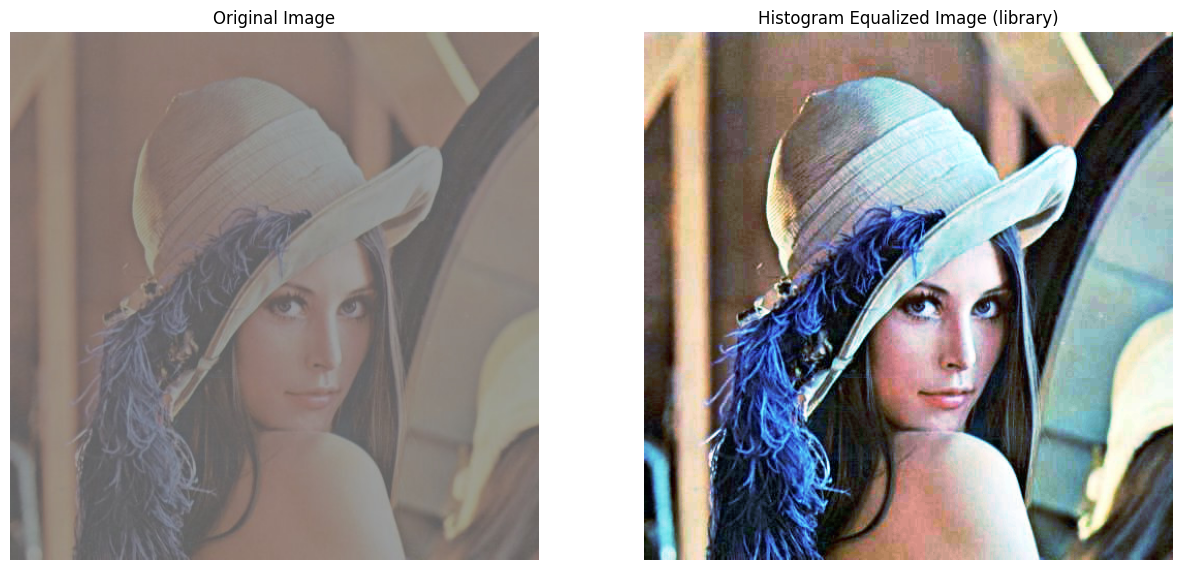

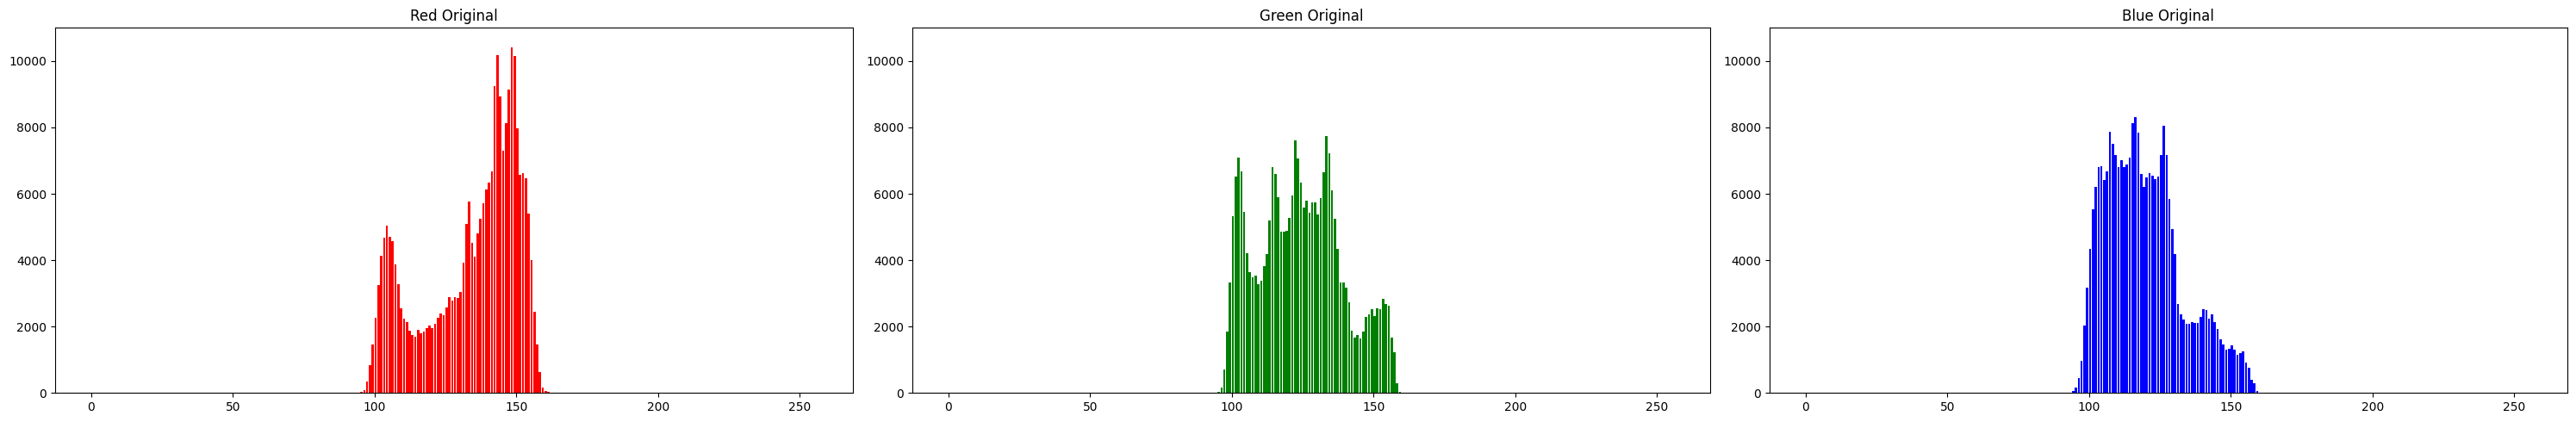

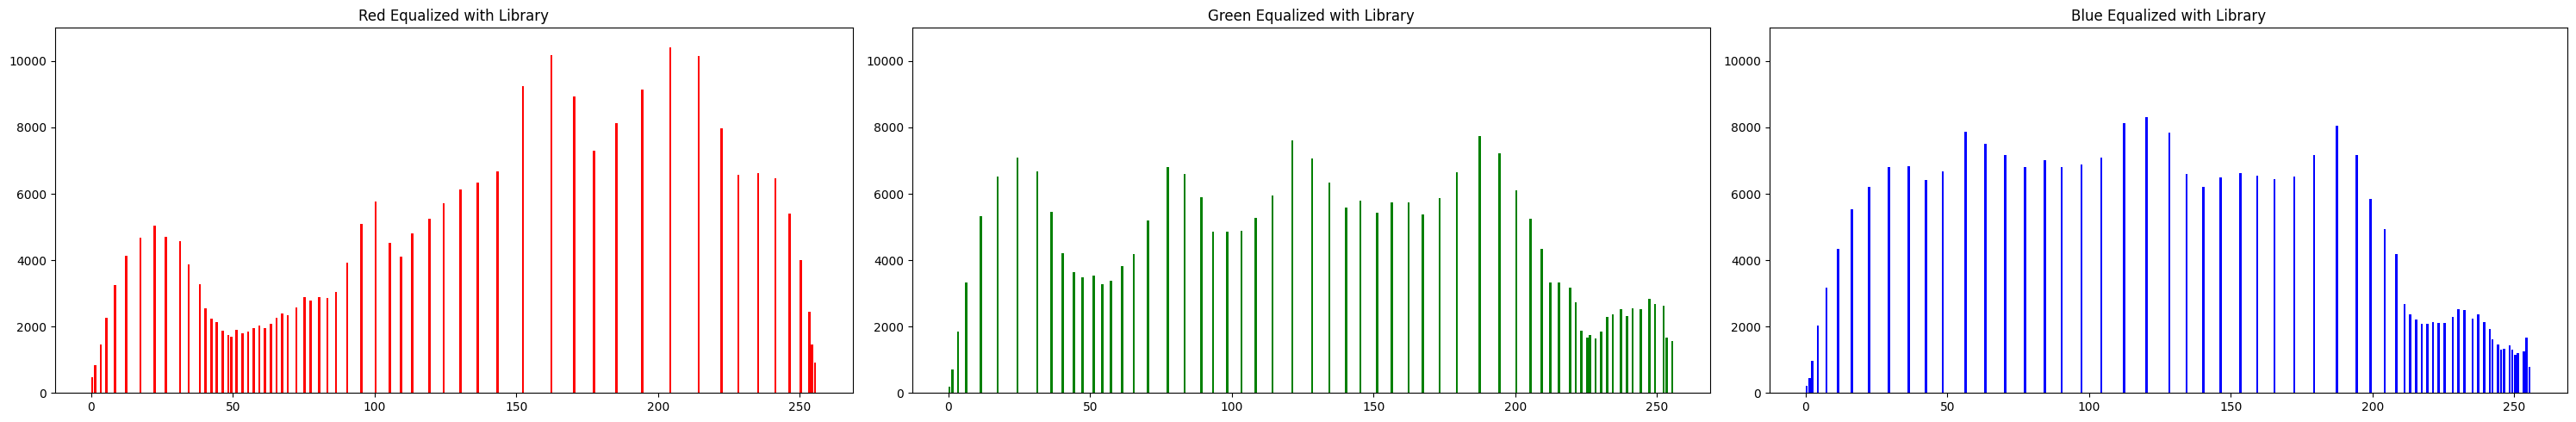

In [ ]:
# memisahkan channel warna
b, g, r = cv.split(img2)

# penerapan library equalizeHist
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# penggabungan channel warna
img2_eq2 = cv.merge((b_eq, g_eq, r_eq))

# conversi warna BGR to RGB
img2_eq2 = cv.cvtColor(img2_eq2, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img2_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram Equalized Image (library)')
plt.imshow(img2_eq2)
plt.axis('off')
plt.show()

npHist1(img2_rgb, 'Original')
npHist1(img2_eq2, 'Equalized with Library')

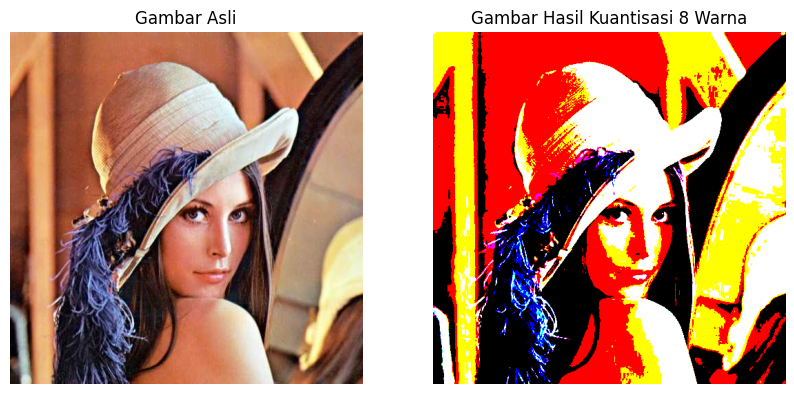

In [ ]:
# Definisikan 8 warna dasar dalam RGB
colors = {
    'black': (0, 0, 0),
    'white': (255, 255, 255),
    'red': (255, 0, 0),
    'green': (0, 255, 0),
    'blue': (0, 0, 255),
    'yellow': (255, 255, 0),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255)
}

# Fungsi untuk menghitung jarak antara dua warna
def color_distance(c1, c2):
    return np.sqrt(np.sum((np.array(c1) - np.array(c2)) ** 2))

# Fungsi untuk memetakan piksel ke warna terdekat
def quantize_color(pixel):
    distances = {color: color_distance(pixel, colors[color]) for color in colors}
    return colors[min(distances, key=distances.get)]

# Menerapkan kuantisasi warna untuk setiap piksel
quantized_image = np.zeros_like(img1)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        quantized_image[i, j] = quantize_color(img1[i, j])

# Konversi dari BGR ke RGB untuk ditampilkan menggunakan matplotlib
image_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
quantized_image_rgb = cv.cvtColor(quantized_image, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli dan hasil kuantisasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar hasil kuantisasi
plt.subplot(1, 2, 2)
plt.imshow(quantized_image_rgb)
plt.title('Gambar Hasil Kuantisasi 8 Warna')
plt.axis('off')

plt.show()

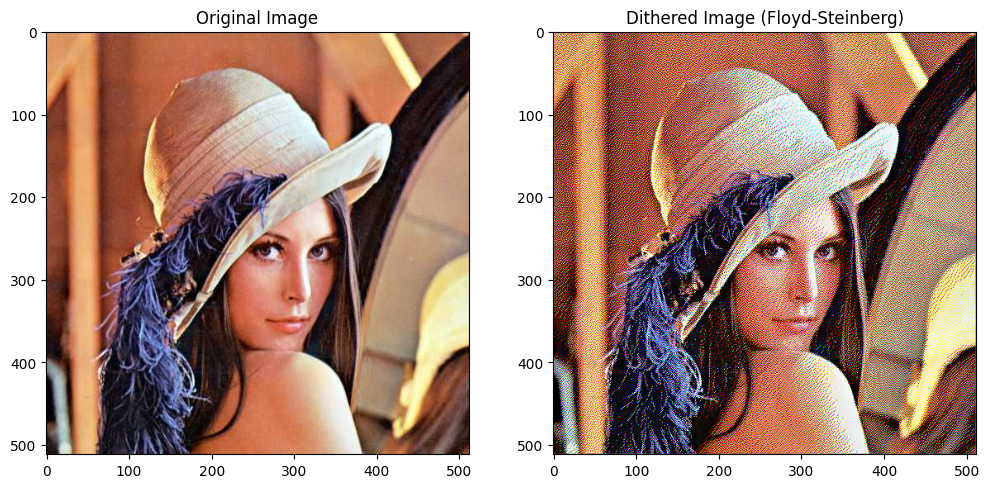

In [ ]:
img_np = np.array(img1_rgb)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg(img,jarak_pixel):
    img_new = img.copy()
    img_red = img_new[:, :, 0]
    img_green = img_new[:, :, 1]
    img_blue = img_new[:, :, 2]
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            r_old = img_red[i, j]
            g_old = img_green[i, j]
            b_old = img_blue[i, j]
            # Hitung nilai piksel baru berdasarkan jarak
            r_new = np.round(jarak_pixel * r_old / 255.0) * (255 / jarak_pixel)
            g_new = np.round(jarak_pixel * g_old / 255.0) * (255 / jarak_pixel)
            b_new = np.round(jarak_pixel * b_old / 255.0) * (255 / jarak_pixel)

            img_red[i, j] = r_new
            img_green[i, j] = g_new
            img_blue[i, j] = b_new
            # hitung error
            error_red = r_old - r_new
            error_green = g_old - g_new
            error_blue = b_old - b_new

            # Terapkan Floyd-Steinberg
            # Posisi R1
            img_red[i+1, j] = threshold(img_red[i+1, j] + error_red * 7/16)
            img_green[i+1, j] = threshold(img_green[i+1, j] + error_green * 7/16)
            img_blue[i+1, j] = threshold(img_blue[i+1, j] + error_blue * 7/16)
            #Posisi R2
            img_red[i-1, j+1] = threshold(img_red[i-1, j+1] + error_red * 3/16)
            img_green[i-1, j+1] = threshold(img_green[i-1, j+1] + error_green * 3/16)
            img_blue[i-1, j+1] = threshold(img_blue[i-1, j+1] + error_blue * 3/16)
            #Posisi R3
            img_red[i,j+1] = threshold(img_red[i,j+1] + error_red * 5/16)
            img_green[i,j+1] = threshold(img_green[i,j+1] + error_green * 5/16)
            img_blue[i,j+1] = threshold(img_blue[i,j+1] + error_blue * 5/16)
            #Posisi R4
            img_red[i+1,j+1] = threshold(img_red[i+1,j+1] + error_red * 1/16)
            img_green[i+1,j+1] = threshold(img_green[i+1,j+1] + error_green * 1/16)
            img_blue[i+1,j+1] = threshold(img_blue[i+1,j+1] + error_blue * 1/16)


    img_dithered = np.stack((img_red, img_green, img_blue), axis=2)
    return np.clip(img_dithered, 0, 255).astype(np.uint8)

dithered_image = floyd_steinberg(img_np,1)

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()

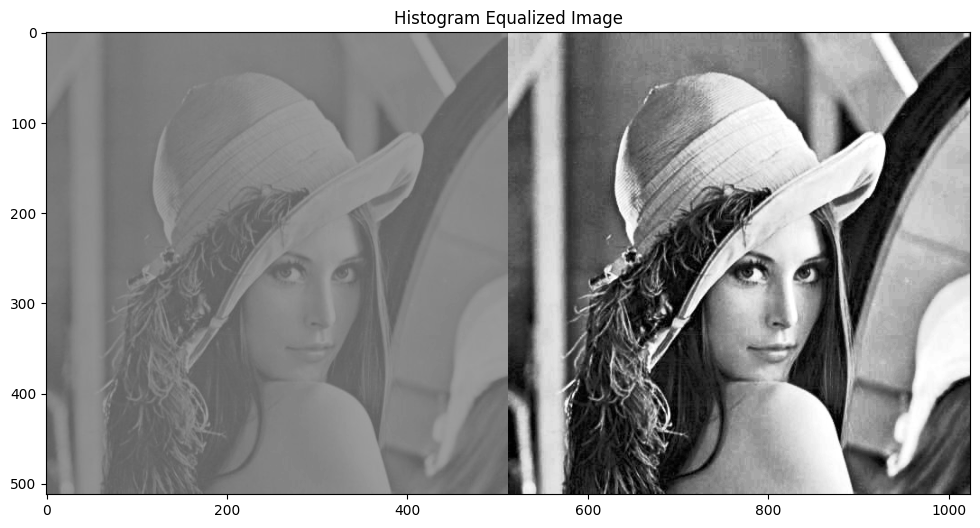

<Figure size 2000x500 with 0 Axes>

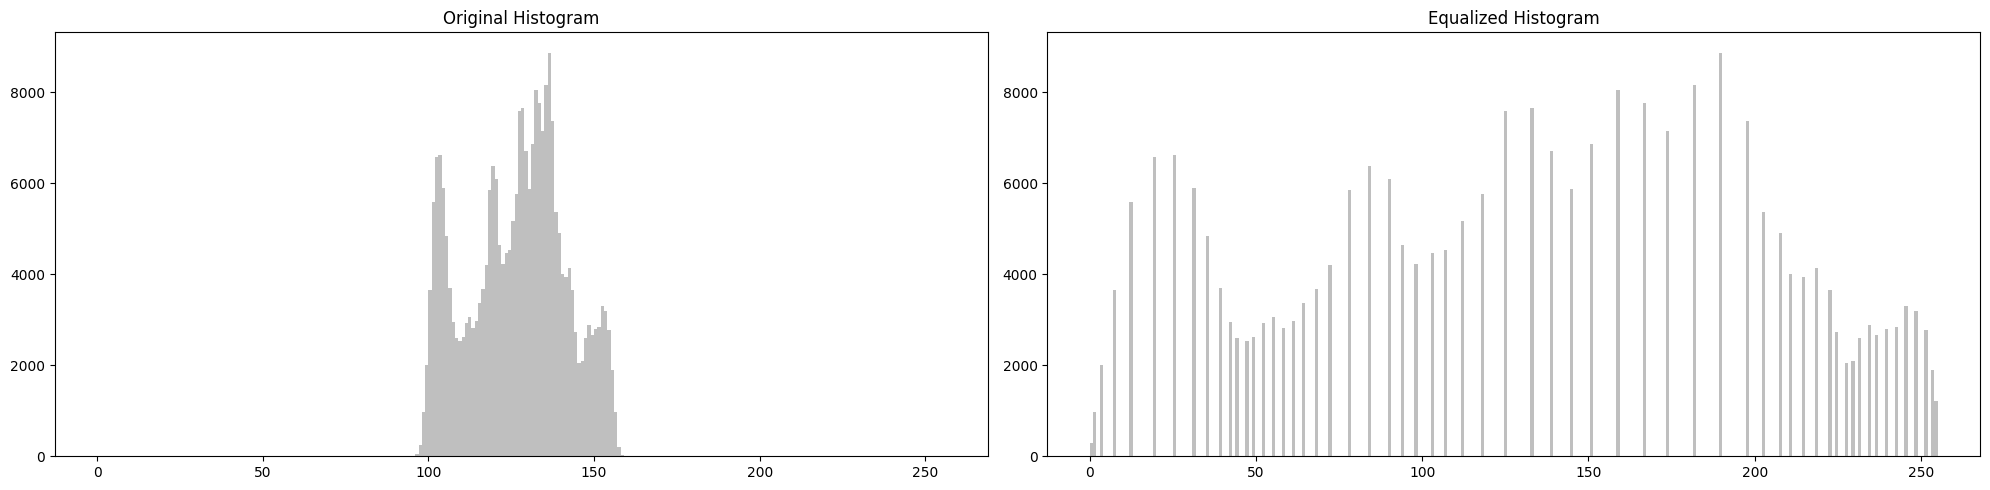

In [ ]:
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img_eq = cv.equalizeHist(img2_gray)
res = np.hstack((img2_gray,img_eq))
# Perbedaan gambar asli dan yang sudah di-equalize
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(res,cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

plt.figure(figsize=(20, 5))
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
# Histogram gambar asli
axs[0].hist(img2_gray.flatten(), bins=256,range=(0,256), color='gray', alpha=0.5)
axs[0].set_title('Original Histogram')

# Histogram gambar yang sudah di-equalize
axs[1].hist(img_eq.flatten(), bins=256, color='gray', alpha=0.5)
axs[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()

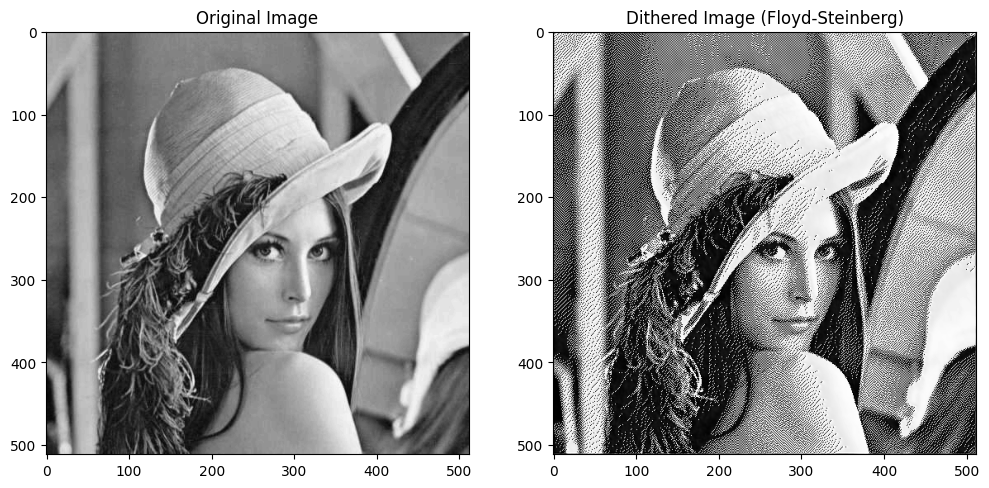

In [ ]:
def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value


def floyd_steinberg(img,jarak_pixel):
    img2_gray = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            img_old = img2_gray[i,j]
            # Hitung nilai piksel baru berdasarkan jarak
            img_new = np.round(jarak_pixel * img_old / 255.0) * (255 / jarak_pixel)

            img2_gray[i, j] = img_new
            # hitung error
            error = img_old - img_new
            # Terapkan Floyd-Steinberg
            # Posisi R1
            img2_gray[i+1, j] = threshold(img2_gray[i+1, j] + error * 7/16)
            #Posisi R2
            img2_gray[i-1, j+1] = threshold(img2_gray[i-1, j+1] + error * 3/16)
            #Posisi R3
            img2_gray[i,j+1] = threshold(img2_gray[i,j+1] + error * 5/16)
            #Posisi R4
            img2_gray[i+1,j+1] = threshold(img2_gray[i+1,j+1] + error * 1/16)

    return np.clip(img2_gray, 0, 255).astype(np.uint8)

dithered_image = floyd_steinberg(img_eq,1)
# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img2_gray,cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image,cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()